All the datasets cannot be provided publically, so we provided one sample file named "radar.nc", which can be downloaded from the following link. https://drive.google.com/file/d/1n8cHSeAwP7uae-MA_6KuhC3JVPZr2K2Z/view?usp=sharing



NetCDF files exist in many formats, but look at the format we used before using the code presented in this repository. Also, ensure that all the variables exist in the RADAR.NC file.

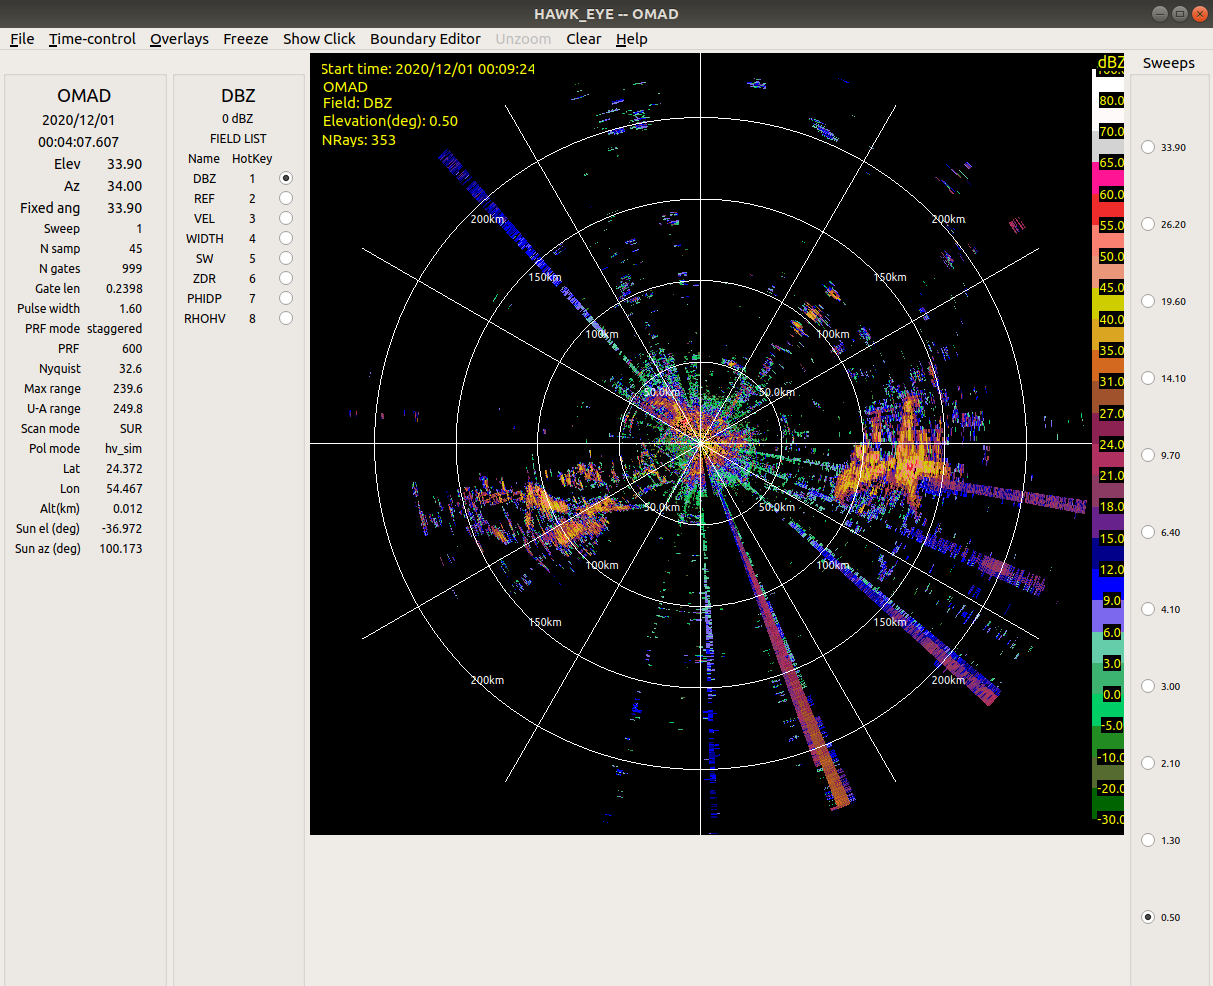


Second panel shows all the 8 2-dimension variables.

Data shape:  (4138, 1599)
Moviepy - Building video ./images.mp4.
Moviepy - Writing video ./images.mp4



Moviepy - Done !
Moviepy - video ready ./images.mp4


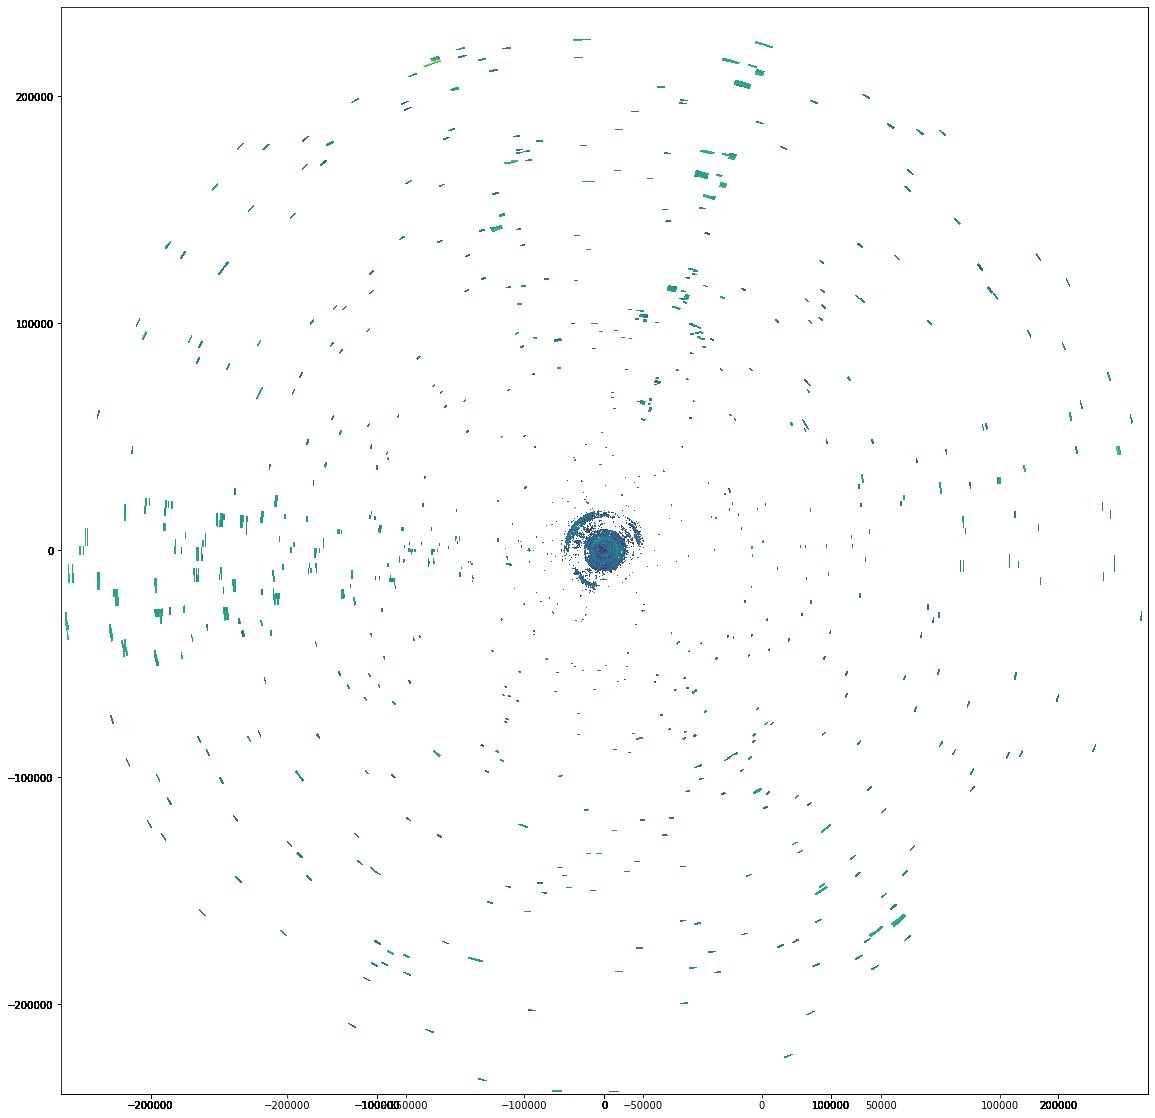

In [10]:
import pandas as pd
import numpy as np
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import re
import sys
import os
import moviepy.video.io.ImageSequenceClip
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    plt.ion()
fig = plt.figure(figsize=(20,20))
import os


# Helper function to make a video.
def makevideo(image_folder,video_name):
    fps=1
    image_files = [os.path.join(image_folder,img)
                for img in os.listdir(image_folder)
                if img.endswith(".png")]
    
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
    clip.write_videofile(image_folder+'.mp4')

# Helper function to sort the files.
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)



#  Define a function that will read a file and return data, angles, and range for a particular sweepnumber
def readdata(outdict):
    # Read the data.
    dbz_all = outdict['variables'][dataname]['data']
    print("Data shape: ",dbz_all.shape)

    # Read the range parameter.
    r = outdict['variables']['range']['data']
    # Read the number of sweeps.
    nsweeps = outdict['variables']['sweep_number']['data']
    # Read sweep start ray index.
    ssidx = outdict['variables']['sweep_start_ray_index']['data']
    # Read sweep end ray index.
    seidx = outdict['variables']['sweep_end_ray_index']['data']
    # Read the angel.
    sazi = outdict['variables']['azimuth']['data']
    dbz = {}
    azi = {}
    rng = {}
    # For each sweep, read the information and store it in the dictionary.
    for loop in range(0,len(nsweeps)):
        dbz[loop] = dbz_all[ssidx[loop]:seidx[loop],:]    
        azi[loop] = sazi[ssidx[loop]:seidx[loop]]
        rng[loop] = r
    return dbz, azi, rng, nsweeps

# Specify the variable which you want to visualize and ensure it exists in the data.
dataname = "DBZ"


imagedirec = "./images"
radarfile = "Sampleradardata.nc"
if not os.path.exists(imagedirec):
    os.mkdir(imagedirec)

# Read each file.
data,azi,rng,nsweeps =  readdata(wrl.io.read_generic_netcdf(radarfile))
count=0
for sweep in nsweeps:
    # Visualize the images.
    im = wrl.vis.plot_ppi(data[sweep], r=rng[sweep], az=azi[sweep], fig=fig)     

    # Save the image.
    plt.savefig(imagedirec+os.sep+str(count)+".png")
    count=count+1

# Once images are generated, the next step is to make a video.
# Define newdirectory containing the images and video_name
makevideo(imagedirec,"video_name")